Deliverable 1: Preprocessing the Data for a Neural Network¶

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'])

In [3]:
# Determine the number of unique values in each column.
column_headers = list(application_df.columns.values)
print(column_headers)

['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS', 'ASK_AMT', 'IS_SUCCESSFUL']


In [4]:
application_df[column_headers].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
APP_TYPE_COUNTS = application_df.APPLICATION_TYPE.value_counts()
print(APP_TYPE_COUNTS)

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


<AxesSubplot:ylabel='Density'>

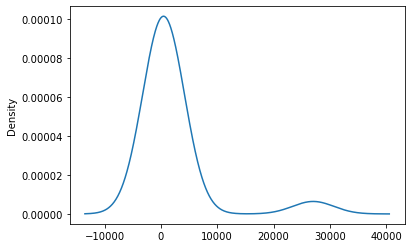

In [6]:
# Visualize the value counts of APPLICATION_TYPE
APP_TYPE_COUNTS.plot.density()

In [7]:
# Determine which values to replace if counts are less than ...?
replace_application = list(APP_TYPE_COUNTS[APP_TYPE_COUNTS < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
CLASSIFICATION_COUNTS = application_df.CLASSIFICATION.value_counts()
print(CLASSIFICATION_COUNTS)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


<AxesSubplot:ylabel='Density'>

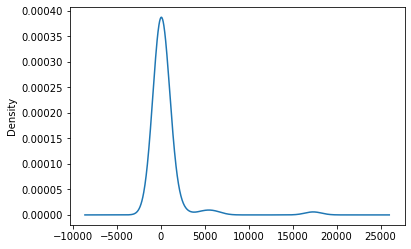

In [9]:
# Visualize the value counts of CLASSIFICATION
CLASSIFICATION_COUNTS.plot.density()

In [10]:
# Determine which values to replace if counts are less than ..?
replace_class = list(CLASSIFICATION_COUNTS[CLASSIFICATION_COUNTS < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [11]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes== "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [12]:
application_df[application_cat].dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
dtype: object

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

/var/folders/v5/bjmcjwhs35xckqln3dg880km0000gn/T/ipykernel_68142/3768494989.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df = application_df.drop(application_cat, 1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns= ["IS_SUCCESSFUL"], axis = 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Deliverable 2: Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                3520      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


2021-10-22 10:23:11.992908: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [19]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

In [21]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=1000, callbacks=[cp_callback])

2021-10-22 10:23:12.128322: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1000
804/804 [==============================] - 1s 591us/step - loss: 0.5698 - accuracy: 0.7227

Epoch 00001: saving model to checkpoints/weights.01.hdf5
Epoch 2/1000
804/804 [==============================] - 0s 584us/step - loss: 0.5545 - accuracy: 0.7308

Epoch 00002: saving model to checkpoints/weights.02.hdf5
Epoch 3/1000
804/804 [==============================] - 0s 579us/step - loss: 0.5511 - accuracy: 0.7316

Epoch 00003: saving model to checkpoints/weights.03.hdf5
Epoch 4/1000
804/804 [==============================] - 0s 597us/step - loss: 0.5502 - accuracy: 0.7306

Epoch 00004: saving model to checkpoints/weights.04.hdf5
Epoch 5/1000
804/804 [==============================] - 1s 628us/step - loss: 0.5486 - accuracy: 0.7326

Epoch 00005: saving model to checkpoints/weights.05.hdf5
Epoch 6/1000
804/804 [==============================] - 0s 607us/step - loss: 0.5476 - accuracy: 0.7341

Epoch 00006: saving model to checkpoints/weights.06.hdf5
Epoch 7/1000
804/804 [======

804/804 [==============================] - 0s 609us/step - loss: 0.5373 - accuracy: 0.7400

Epoch 00051: saving model to checkpoints/weights.51.hdf5
Epoch 52/1000
804/804 [==============================] - 0s 599us/step - loss: 0.5368 - accuracy: 0.7399

Epoch 00052: saving model to checkpoints/weights.52.hdf5
Epoch 53/1000
804/804 [==============================] - 0s 594us/step - loss: 0.5374 - accuracy: 0.7400

Epoch 00053: saving model to checkpoints/weights.53.hdf5
Epoch 54/1000
804/804 [==============================] - 0s 597us/step - loss: 0.5371 - accuracy: 0.7381

Epoch 00054: saving model to checkpoints/weights.54.hdf5
Epoch 55/1000
804/804 [==============================] - 0s 602us/step - loss: 0.5367 - accuracy: 0.7386

Epoch 00055: saving model to checkpoints/weights.55.hdf5
Epoch 56/1000
804/804 [==============================] - 0s 596us/step - loss: 0.5371 - accuracy: 0.7396

Epoch 00056: saving model to checkpoints/weights.56.hdf5
Epoch 57/1000
804/804 [=============

804/804 [==============================] - 0s 610us/step - loss: 0.5343 - accuracy: 0.7411

Epoch 00101: saving model to checkpoints/weights.101.hdf5
Epoch 102/1000
804/804 [==============================] - 0s 608us/step - loss: 0.5349 - accuracy: 0.7418

Epoch 00102: saving model to checkpoints/weights.102.hdf5
Epoch 103/1000
804/804 [==============================] - 0s 607us/step - loss: 0.5341 - accuracy: 0.7407

Epoch 00103: saving model to checkpoints/weights.103.hdf5
Epoch 104/1000
804/804 [==============================] - 0s 606us/step - loss: 0.5342 - accuracy: 0.7416

Epoch 00104: saving model to checkpoints/weights.104.hdf5
Epoch 105/1000
804/804 [==============================] - 0s 605us/step - loss: 0.5342 - accuracy: 0.7416

Epoch 00105: saving model to checkpoints/weights.105.hdf5
Epoch 106/1000
804/804 [==============================] - 0s 607us/step - loss: 0.5340 - accuracy: 0.7413

Epoch 00106: saving model to checkpoints/weights.106.hdf5
Epoch 107/1000
804/804 [=

804/804 [==============================] - 0s 609us/step - loss: 0.5336 - accuracy: 0.7420

Epoch 00151: saving model to checkpoints/weights.151.hdf5
Epoch 152/1000
804/804 [==============================] - 0s 606us/step - loss: 0.5324 - accuracy: 0.7418

Epoch 00152: saving model to checkpoints/weights.152.hdf5
Epoch 153/1000
804/804 [==============================] - 0s 607us/step - loss: 0.5325 - accuracy: 0.7418

Epoch 00153: saving model to checkpoints/weights.153.hdf5
Epoch 154/1000
804/804 [==============================] - 0s 614us/step - loss: 0.5324 - accuracy: 0.7415

Epoch 00154: saving model to checkpoints/weights.154.hdf5
Epoch 155/1000
804/804 [==============================] - 1s 649us/step - loss: 0.5326 - accuracy: 0.7421

Epoch 00155: saving model to checkpoints/weights.155.hdf5
Epoch 156/1000
804/804 [==============================] - 0s 619us/step - loss: 0.5325 - accuracy: 0.7420

Epoch 00156: saving model to checkpoints/weights.156.hdf5
Epoch 157/1000
804/804 [=

804/804 [==============================] - 0s 610us/step - loss: 0.5315 - accuracy: 0.7426

Epoch 00201: saving model to checkpoints/weights.201.hdf5
Epoch 202/1000
804/804 [==============================] - 0s 610us/step - loss: 0.5312 - accuracy: 0.7422

Epoch 00202: saving model to checkpoints/weights.202.hdf5
Epoch 203/1000
804/804 [==============================] - 0s 607us/step - loss: 0.5318 - accuracy: 0.7420

Epoch 00203: saving model to checkpoints/weights.203.hdf5
Epoch 204/1000
804/804 [==============================] - 0s 608us/step - loss: 0.5318 - accuracy: 0.7430

Epoch 00204: saving model to checkpoints/weights.204.hdf5
Epoch 205/1000
804/804 [==============================] - 0s 609us/step - loss: 0.5314 - accuracy: 0.7426

Epoch 00205: saving model to checkpoints/weights.205.hdf5
Epoch 206/1000
804/804 [==============================] - 0s 610us/step - loss: 0.5320 - accuracy: 0.7422

Epoch 00206: saving model to checkpoints/weights.206.hdf5
Epoch 207/1000
804/804 [=

804/804 [==============================] - 0s 609us/step - loss: 0.5311 - accuracy: 0.7425

Epoch 00251: saving model to checkpoints/weights.251.hdf5
Epoch 252/1000
804/804 [==============================] - 0s 610us/step - loss: 0.5338 - accuracy: 0.7422

Epoch 00252: saving model to checkpoints/weights.252.hdf5
Epoch 253/1000
804/804 [==============================] - 0s 609us/step - loss: 0.5312 - accuracy: 0.7423

Epoch 00253: saving model to checkpoints/weights.253.hdf5
Epoch 254/1000
804/804 [==============================] - 0s 613us/step - loss: 0.5316 - accuracy: 0.7427

Epoch 00254: saving model to checkpoints/weights.254.hdf5
Epoch 255/1000
804/804 [==============================] - 0s 611us/step - loss: 0.5315 - accuracy: 0.7430

Epoch 00255: saving model to checkpoints/weights.255.hdf5
Epoch 256/1000
804/804 [==============================] - 0s 610us/step - loss: 0.5312 - accuracy: 0.7423

Epoch 00256: saving model to checkpoints/weights.256.hdf5
Epoch 257/1000
804/804 [=

804/804 [==============================] - 0s 610us/step - loss: 0.5305 - accuracy: 0.7425

Epoch 00301: saving model to checkpoints/weights.301.hdf5
Epoch 302/1000
804/804 [==============================] - 0s 607us/step - loss: 0.5307 - accuracy: 0.7422

Epoch 00302: saving model to checkpoints/weights.302.hdf5
Epoch 303/1000
804/804 [==============================] - 0s 610us/step - loss: 0.5310 - accuracy: 0.7422

Epoch 00303: saving model to checkpoints/weights.303.hdf5
Epoch 304/1000
804/804 [==============================] - 0s 607us/step - loss: 0.5308 - accuracy: 0.7427

Epoch 00304: saving model to checkpoints/weights.304.hdf5
Epoch 305/1000
804/804 [==============================] - 0s 609us/step - loss: 0.5306 - accuracy: 0.7430

Epoch 00305: saving model to checkpoints/weights.305.hdf5
Epoch 306/1000
804/804 [==============================] - 0s 609us/step - loss: 0.5305 - accuracy: 0.7433

Epoch 00306: saving model to checkpoints/weights.306.hdf5
Epoch 307/1000
804/804 [=

804/804 [==============================] - 0s 613us/step - loss: 0.5314 - accuracy: 0.7427

Epoch 00351: saving model to checkpoints/weights.351.hdf5
Epoch 352/1000
804/804 [==============================] - 1s 621us/step - loss: 0.5304 - accuracy: 0.7427

Epoch 00352: saving model to checkpoints/weights.352.hdf5
Epoch 353/1000
804/804 [==============================] - 1s 628us/step - loss: 0.5304 - accuracy: 0.7426

Epoch 00353: saving model to checkpoints/weights.353.hdf5
Epoch 354/1000
804/804 [==============================] - 1s 637us/step - loss: 0.5307 - accuracy: 0.7430

Epoch 00354: saving model to checkpoints/weights.354.hdf5
Epoch 355/1000
804/804 [==============================] - 1s 667us/step - loss: 0.5304 - accuracy: 0.7424

Epoch 00355: saving model to checkpoints/weights.355.hdf5
Epoch 356/1000
804/804 [==============================] - 1s 634us/step - loss: 0.5303 - accuracy: 0.7429

Epoch 00356: saving model to checkpoints/weights.356.hdf5
Epoch 357/1000
804/804 [=

804/804 [==============================] - 0s 606us/step - loss: 0.5300 - accuracy: 0.7427

Epoch 00401: saving model to checkpoints/weights.401.hdf5
Epoch 402/1000
804/804 [==============================] - 0s 601us/step - loss: 0.5298 - accuracy: 0.7427

Epoch 00402: saving model to checkpoints/weights.402.hdf5
Epoch 403/1000
804/804 [==============================] - 0s 608us/step - loss: 0.5297 - accuracy: 0.7431

Epoch 00403: saving model to checkpoints/weights.403.hdf5
Epoch 404/1000
804/804 [==============================] - 0s 607us/step - loss: 0.5298 - accuracy: 0.7432

Epoch 00404: saving model to checkpoints/weights.404.hdf5
Epoch 405/1000
804/804 [==============================] - 0s 603us/step - loss: 0.5301 - accuracy: 0.7433

Epoch 00405: saving model to checkpoints/weights.405.hdf5
Epoch 406/1000
804/804 [==============================] - 0s 601us/step - loss: 0.5299 - accuracy: 0.7426

Epoch 00406: saving model to checkpoints/weights.406.hdf5
Epoch 407/1000
804/804 [=

804/804 [==============================] - 0s 606us/step - loss: 0.5294 - accuracy: 0.7434

Epoch 00451: saving model to checkpoints/weights.451.hdf5
Epoch 452/1000
804/804 [==============================] - 1s 630us/step - loss: 0.5299 - accuracy: 0.7427

Epoch 00452: saving model to checkpoints/weights.452.hdf5
Epoch 453/1000
804/804 [==============================] - 0s 601us/step - loss: 0.5297 - accuracy: 0.7433

Epoch 00453: saving model to checkpoints/weights.453.hdf5
Epoch 454/1000
804/804 [==============================] - 0s 600us/step - loss: 0.5306 - accuracy: 0.7430

Epoch 00454: saving model to checkpoints/weights.454.hdf5
Epoch 455/1000
804/804 [==============================] - 0s 605us/step - loss: 0.5295 - accuracy: 0.7425

Epoch 00455: saving model to checkpoints/weights.455.hdf5
Epoch 456/1000
804/804 [==============================] - 0s 607us/step - loss: 0.5295 - accuracy: 0.7420

Epoch 00456: saving model to checkpoints/weights.456.hdf5
Epoch 457/1000
804/804 [=

804/804 [==============================] - 0s 603us/step - loss: 0.5293 - accuracy: 0.7435

Epoch 00501: saving model to checkpoints/weights.501.hdf5
Epoch 502/1000
804/804 [==============================] - 0s 597us/step - loss: 0.5298 - accuracy: 0.7435

Epoch 00502: saving model to checkpoints/weights.502.hdf5
Epoch 503/1000
804/804 [==============================] - 0s 595us/step - loss: 0.5303 - accuracy: 0.7428

Epoch 00503: saving model to checkpoints/weights.503.hdf5
Epoch 504/1000
804/804 [==============================] - 0s 600us/step - loss: 0.5304 - accuracy: 0.7430

Epoch 00504: saving model to checkpoints/weights.504.hdf5
Epoch 505/1000
804/804 [==============================] - 0s 599us/step - loss: 0.5295 - accuracy: 0.7432

Epoch 00505: saving model to checkpoints/weights.505.hdf5
Epoch 506/1000
804/804 [==============================] - 0s 601us/step - loss: 0.5294 - accuracy: 0.7430

Epoch 00506: saving model to checkpoints/weights.506.hdf5
Epoch 507/1000
804/804 [=

804/804 [==============================] - 0s 600us/step - loss: 0.5300 - accuracy: 0.7430

Epoch 00551: saving model to checkpoints/weights.551.hdf5
Epoch 552/1000
804/804 [==============================] - 0s 599us/step - loss: 0.5293 - accuracy: 0.7429

Epoch 00552: saving model to checkpoints/weights.552.hdf5
Epoch 553/1000
804/804 [==============================] - 0s 601us/step - loss: 0.5289 - accuracy: 0.7432

Epoch 00553: saving model to checkpoints/weights.553.hdf5
Epoch 554/1000
804/804 [==============================] - 0s 602us/step - loss: 0.5291 - accuracy: 0.7431

Epoch 00554: saving model to checkpoints/weights.554.hdf5
Epoch 555/1000
804/804 [==============================] - 0s 600us/step - loss: 0.5290 - accuracy: 0.7427

Epoch 00555: saving model to checkpoints/weights.555.hdf5
Epoch 556/1000
804/804 [==============================] - 0s 599us/step - loss: 0.5293 - accuracy: 0.7434

Epoch 00556: saving model to checkpoints/weights.556.hdf5
Epoch 557/1000
804/804 [=

804/804 [==============================] - 0s 603us/step - loss: 0.5288 - accuracy: 0.7434

Epoch 00601: saving model to checkpoints/weights.601.hdf5
Epoch 602/1000
804/804 [==============================] - 0s 602us/step - loss: 0.5291 - accuracy: 0.7435

Epoch 00602: saving model to checkpoints/weights.602.hdf5
Epoch 603/1000
804/804 [==============================] - 0s 601us/step - loss: 0.5290 - accuracy: 0.7428

Epoch 00603: saving model to checkpoints/weights.603.hdf5
Epoch 604/1000
804/804 [==============================] - 0s 602us/step - loss: 0.5291 - accuracy: 0.7430

Epoch 00604: saving model to checkpoints/weights.604.hdf5
Epoch 605/1000
804/804 [==============================] - 0s 599us/step - loss: 0.5292 - accuracy: 0.7430

Epoch 00605: saving model to checkpoints/weights.605.hdf5
Epoch 606/1000
804/804 [==============================] - 0s 600us/step - loss: 0.5289 - accuracy: 0.7431

Epoch 00606: saving model to checkpoints/weights.606.hdf5
Epoch 607/1000
804/804 [=

804/804 [==============================] - 0s 606us/step - loss: 0.5286 - accuracy: 0.7435

Epoch 00651: saving model to checkpoints/weights.651.hdf5
Epoch 652/1000
804/804 [==============================] - 0s 605us/step - loss: 0.5309 - accuracy: 0.7437

Epoch 00652: saving model to checkpoints/weights.652.hdf5
Epoch 653/1000
804/804 [==============================] - 0s 604us/step - loss: 0.5290 - accuracy: 0.7430

Epoch 00653: saving model to checkpoints/weights.653.hdf5
Epoch 654/1000
804/804 [==============================] - 0s 604us/step - loss: 0.5293 - accuracy: 0.7425

Epoch 00654: saving model to checkpoints/weights.654.hdf5
Epoch 655/1000
804/804 [==============================] - 0s 603us/step - loss: 0.5296 - accuracy: 0.7428

Epoch 00655: saving model to checkpoints/weights.655.hdf5
Epoch 656/1000
804/804 [==============================] - 0s 602us/step - loss: 0.5292 - accuracy: 0.7428

Epoch 00656: saving model to checkpoints/weights.656.hdf5
Epoch 657/1000
804/804 [=

804/804 [==============================] - 0s 616us/step - loss: 0.5288 - accuracy: 0.7437

Epoch 00701: saving model to checkpoints/weights.701.hdf5
Epoch 702/1000
804/804 [==============================] - 0s 607us/step - loss: 0.5296 - accuracy: 0.7439

Epoch 00702: saving model to checkpoints/weights.702.hdf5
Epoch 703/1000
804/804 [==============================] - 0s 601us/step - loss: 0.5287 - accuracy: 0.7439

Epoch 00703: saving model to checkpoints/weights.703.hdf5
Epoch 704/1000
804/804 [==============================] - 0s 602us/step - loss: 0.5293 - accuracy: 0.7435

Epoch 00704: saving model to checkpoints/weights.704.hdf5
Epoch 705/1000
804/804 [==============================] - 0s 603us/step - loss: 0.5302 - accuracy: 0.7435

Epoch 00705: saving model to checkpoints/weights.705.hdf5
Epoch 706/1000
804/804 [==============================] - 0s 600us/step - loss: 0.5282 - accuracy: 0.7434

Epoch 00706: saving model to checkpoints/weights.706.hdf5
Epoch 707/1000
804/804 [=

804/804 [==============================] - 0s 602us/step - loss: 0.5317 - accuracy: 0.7437

Epoch 00751: saving model to checkpoints/weights.751.hdf5
Epoch 752/1000
804/804 [==============================] - 0s 607us/step - loss: 0.5286 - accuracy: 0.7435

Epoch 00752: saving model to checkpoints/weights.752.hdf5
Epoch 753/1000
804/804 [==============================] - 0s 599us/step - loss: 0.5279 - accuracy: 0.7432

Epoch 00753: saving model to checkpoints/weights.753.hdf5
Epoch 754/1000
804/804 [==============================] - 0s 601us/step - loss: 0.5311 - accuracy: 0.7430

Epoch 00754: saving model to checkpoints/weights.754.hdf5
Epoch 755/1000
804/804 [==============================] - 0s 599us/step - loss: 0.5347 - accuracy: 0.7429

Epoch 00755: saving model to checkpoints/weights.755.hdf5
Epoch 756/1000
804/804 [==============================] - 0s 621us/step - loss: 0.5287 - accuracy: 0.7435

Epoch 00756: saving model to checkpoints/weights.756.hdf5
Epoch 757/1000
804/804 [=

804/804 [==============================] - 0s 601us/step - loss: 0.5279 - accuracy: 0.7435

Epoch 00801: saving model to checkpoints/weights.801.hdf5
Epoch 802/1000
804/804 [==============================] - 0s 604us/step - loss: 0.5282 - accuracy: 0.7434

Epoch 00802: saving model to checkpoints/weights.802.hdf5
Epoch 803/1000
804/804 [==============================] - 0s 600us/step - loss: 0.5279 - accuracy: 0.7437

Epoch 00803: saving model to checkpoints/weights.803.hdf5
Epoch 804/1000
804/804 [==============================] - 0s 601us/step - loss: 0.5285 - accuracy: 0.7439

Epoch 00804: saving model to checkpoints/weights.804.hdf5
Epoch 805/1000
804/804 [==============================] - 0s 602us/step - loss: 0.5284 - accuracy: 0.7437

Epoch 00805: saving model to checkpoints/weights.805.hdf5
Epoch 806/1000
804/804 [==============================] - 0s 600us/step - loss: 0.5282 - accuracy: 0.7438

Epoch 00806: saving model to checkpoints/weights.806.hdf5
Epoch 807/1000
804/804 [=

804/804 [==============================] - 0s 604us/step - loss: 0.5281 - accuracy: 0.7441

Epoch 00851: saving model to checkpoints/weights.851.hdf5
Epoch 852/1000
804/804 [==============================] - 0s 598us/step - loss: 0.5276 - accuracy: 0.7439

Epoch 00852: saving model to checkpoints/weights.852.hdf5
Epoch 853/1000
804/804 [==============================] - 0s 597us/step - loss: 0.5279 - accuracy: 0.7438

Epoch 00853: saving model to checkpoints/weights.853.hdf5
Epoch 854/1000
804/804 [==============================] - 0s 600us/step - loss: 0.5279 - accuracy: 0.7435

Epoch 00854: saving model to checkpoints/weights.854.hdf5
Epoch 855/1000
804/804 [==============================] - 0s 598us/step - loss: 0.5282 - accuracy: 0.7434

Epoch 00855: saving model to checkpoints/weights.855.hdf5
Epoch 856/1000
804/804 [==============================] - 0s 602us/step - loss: 0.5279 - accuracy: 0.7431

Epoch 00856: saving model to checkpoints/weights.856.hdf5
Epoch 857/1000
804/804 [=

804/804 [==============================] - 0s 607us/step - loss: 0.5278 - accuracy: 0.7437

Epoch 00901: saving model to checkpoints/weights.901.hdf5
Epoch 902/1000
804/804 [==============================] - 0s 602us/step - loss: 0.5274 - accuracy: 0.7438

Epoch 00902: saving model to checkpoints/weights.902.hdf5
Epoch 903/1000
804/804 [==============================] - 0s 605us/step - loss: 0.5280 - accuracy: 0.7442

Epoch 00903: saving model to checkpoints/weights.903.hdf5
Epoch 904/1000
804/804 [==============================] - 0s 606us/step - loss: 0.5275 - accuracy: 0.7435

Epoch 00904: saving model to checkpoints/weights.904.hdf5
Epoch 905/1000
804/804 [==============================] - 0s 604us/step - loss: 0.5280 - accuracy: 0.7440

Epoch 00905: saving model to checkpoints/weights.905.hdf5
Epoch 906/1000
804/804 [==============================] - 0s 606us/step - loss: 0.5312 - accuracy: 0.7438

Epoch 00906: saving model to checkpoints/weights.906.hdf5
Epoch 907/1000
804/804 [=

804/804 [==============================] - 0s 601us/step - loss: 0.5278 - accuracy: 0.7437

Epoch 00951: saving model to checkpoints/weights.951.hdf5
Epoch 952/1000
804/804 [==============================] - 0s 599us/step - loss: 0.5277 - accuracy: 0.7441

Epoch 00952: saving model to checkpoints/weights.952.hdf5
Epoch 953/1000
804/804 [==============================] - 0s 598us/step - loss: 0.5421 - accuracy: 0.7442

Epoch 00953: saving model to checkpoints/weights.953.hdf5
Epoch 954/1000
804/804 [==============================] - 0s 600us/step - loss: 0.5279 - accuracy: 0.7441

Epoch 00954: saving model to checkpoints/weights.954.hdf5
Epoch 955/1000
804/804 [==============================] - 0s 601us/step - loss: 0.5277 - accuracy: 0.7439

Epoch 00955: saving model to checkpoints/weights.955.hdf5
Epoch 956/1000
804/804 [==============================] - 0s 597us/step - loss: 0.5285 - accuracy: 0.7437

Epoch 00956: saving model to checkpoints/weights.956.hdf5
Epoch 957/1000
804/804 [=

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6918 - accuracy: 0.7269
Loss: 0.6918317079544067, Accuracy: 0.7268804907798767


In [23]:
#Export Model to HDF5
nn.save("AlphabetSoupCharity_Optimization3.h5")